In [12]:
# 필요한 라이브러리 설치 및 임포트

import pandas as pd

from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.tree import DecisionTreeRegressor as DTR
from sklearn.ensemble import RandomForestRegressor as RFR
from sklearn.ensemble import GradientBoostingRegressor as GBR
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score as acc
from sklearn.metrics import recall_score as recall
import joblib

# [Step 3] 머신러닝 모델링 1

#### **<span style="color:blue">[3-1] 학습 및 테스트 데이터 로딩</span>**

In [13]:
# train_x.csv / train_y.csv / test_x.csv / test_y.csv 4개의 데이터 로딩
train_x = pd.read_csv('train_x.csv')
train_y = pd.read_csv('train_y.csv')
test_x = pd.read_csv('test_x.csv')
test_y = pd.read_csv('test_y.csv')
train_x 

,SO2,CO,O3,NO2,PM10,PM25,기온(°C),강수량(mm),풍속(m/s),풍향(16방위),...,시정(10m),지면온도(°C),5cm 지중온도(°C),10cm 지중온도(°C),20cm 지중온도(°C),30cm 지중온도(°C),month,day,hour,PM10_lag1
0,0.003,0.6,0.002,0.039,31.0,18.0,19.2,0.0,1.3,360.0,...,2000,17.8,22.3,22.3,22.7,22.9,10,1,0,31.0
1,0.003,0.6,0.002,0.035,27.0,16.0,18.7,0.0,1.0,20.0,...,2000,17.4,22.1,22.0,22.5,22.9,10,1,1,27.0
2,0.003,0.6,0.002,0.033,28.0,18.0,18.3,0.0,0.3,0.0,...,2000,17.2,21.8,21.8,22.4,22.8,10,1,2,28.0
3,0.003,0.6,0.002,0.030,26.0,16.0,17.7,0.0,2.0,20.0,...,2000,17.0,21.6,21.6,22.2,22.8,10,1,3,26.0
4,0.003,0.5,0.003,0.026,26.0,16.0,17.4,0.0,1.0,50.0,...,2000,16.5,21.3,21.4,22.0,22.7,10,1,4,26.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8754,0.003,0.7,0.020,0.036,35.0,24.0,22.7,0.0,0.2,0.0,...,2000,20.6,24.2,23.7,23.0,22.6,9,30,19,15.0
8755,0.003,0.6,0.016,0.035,34.0,21.0,21.7,0.0,0.9,320.0,...,2000,19.9,23.7,23.4,23.1,22.8,9,30,20,18.0
8756,0.003,0.6,0.012,0.036,30.0,19.0,20.9,0.0,0.4,0.0,...,2000,19.2,23.3,23.1,23.0,22.9,9,30,21,15.0
8757,0.003,0.6,0.004,0.042,33.0,19.0,20.4,0.0,0.8,70.0,...,2000,18.6,23.0,22.8,22.9,22.9,9,30,22,14.0


---

#### **<span style="color:blue">[3-2] 모델링 </span>**

* 머신 모델을 선정하여 아래에 적절한 코드를 작성해주세요.

In [14]:
# 코드작성
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# XGBoost 모델 초기화 및 학습
model = xgb.XGBRegressor()
model.fit(train_x, train_y)

/Users/kimboseong/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/kimboseong/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/kimboseong/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Users/kimboseong/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  r

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

평균 제곱 오차 (MSE): 45.25539708608152
R^2 value: 0.9179791925461912


/Users/kimboseong/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/kimboseong/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/kimboseong/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Users/kimboseong/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  r

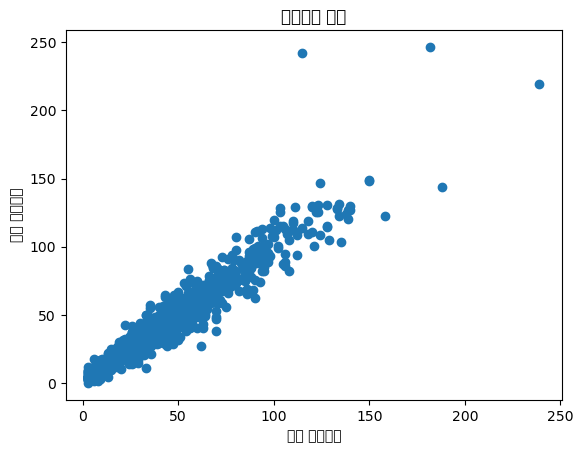

In [15]:
# Test 데이터로 성능을 평가해보세요.
# 모델 평가
y_pred = model.predict(test_x)
mse = mean_squared_error(test_y, y_pred)
print("평균 제곱 오차 (MSE):", mse)

r2 = r2_score(test_y, y_pred)
print(f"R^2 value: {r2}")

# 예측 결과 시각화 (예시로 시각화)
import matplotlib.pyplot as plt

plt.scatter(test_y, y_pred)
plt.xlabel("실제 미세먼지")
plt.ylabel("예측 미세먼지")
plt.title("미세먼지 예측")
plt.show()



In [8]:
import joblib
# 학습한 모델을 파일로 저장해보세요.

model_filename = 'xgboost_model.pkl'
joblib.dump(model, model_filename)

['xgboost_model.pkl']

# [Step 4] 머신러닝 모델링2

In [9]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# K-NN 분류 모델 초기화
k = 3  # 이웃의 수 (K 값)
knn = KNeighborsRegressor(n_neighbors=k)

# 모델 훈련
knn.fit(train_x, train_y)


/Users/kimboseong/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/kimboseong/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


KNeighborsRegressor(n_neighbors=3)

/Users/kimboseong/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


평균 제곱 오차 (MSE): 89.08786008230452
R^2 value: 0.8385373085030366


/Users/kimboseong/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/kimboseong/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/kimboseong/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48120 (\N{HANGUL SYLLABLE MI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/kimboseong/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49464 (\N{HANGUL SYLLABLE SE}) missing from current font.
  fig.canvas.print_fig

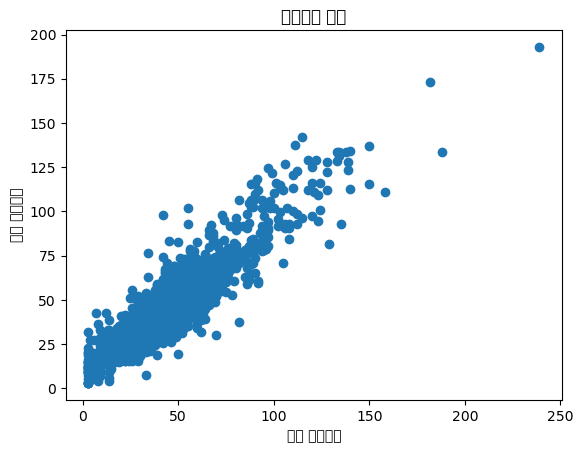

In [16]:
# Test 데이터로 성능을 평가해보세요.
# 모델 평가
y_pred = knn.predict(test_x)
mse = mean_squared_error(test_y, y_pred)
print("평균 제곱 오차 (MSE):", mse)

r2 = r2_score(test_y, y_pred)
print(f"R^2 value: {r2}")

# 예측 결과 시각화 (예시로 시각화)
import matplotlib.pyplot as plt

plt.scatter(test_y, y_pred)
plt.xlabel("실제 미세먼지")
plt.ylabel("예측 미세먼지")
plt.title("미세먼지 예측")
plt.show()

In [17]:
# 학습한 모델을 파일로 저장해보세요.
# 모델을 파일로 저장
model_filename = 'knn_model.pkl'
joblib.dump(knn, model_filename)


['knn_model.pkl']

In [ ]:
# 확인할 수 있는 인사이트
# 1.
# 2.
# 3.